<a href="https://colab.research.google.com/github/marcinwolter/MachineLearnin2019/blob/master/plot_digits_classif_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline


Simple visualization and classification of the digits dataset
=============================================================

Plot the first few samples of the digits dataset, then do a simple MLP classification

*Marcin Wolter*



In [0]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.model_selection import train_test_split


# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

# rescale the data, use the traditional train/test split
#X_train, X_test = X[:60000], X[60000:]
#y_train, y_test = y[:60000], y[60000:]

# split the data into training and validation sets
init = np.random.randint(0,1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=init, train_size=60000)




Plot the data: images of digits
-------------------------------

Each data in a 28x28 image



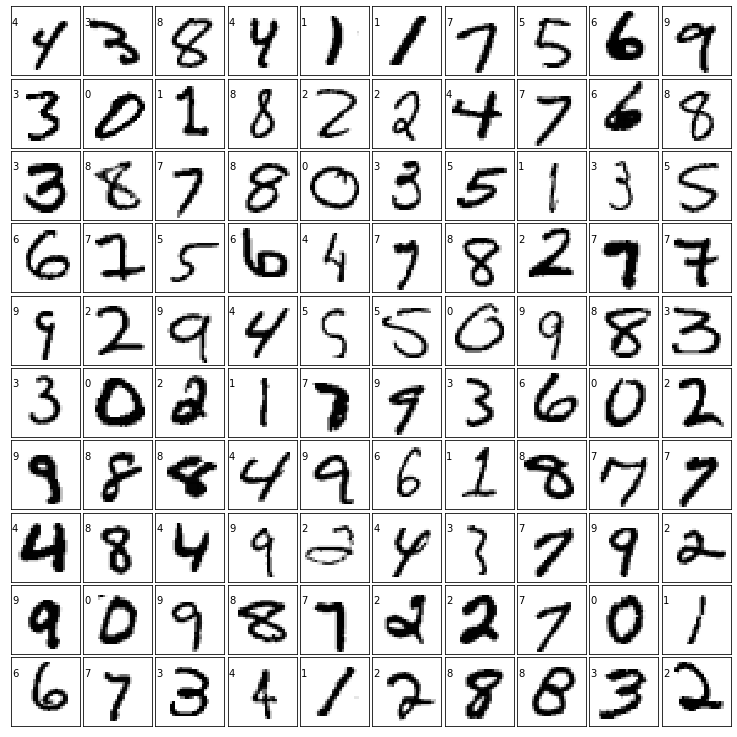

In [53]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10, 10))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(y_test[i]))

## **Classify with MLP**

In [54]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier


# train the model
#clf = GaussianNB()
#clf = LinearDiscriminantAnalysis()
#clf = KNeighborsClassifier(5)
clf =  MLPClassifier(alpha=0.05, max_iter=10000,solver='adam', random_state=1,
                hidden_layer_sizes=[100, 100],early_stopping=True,
                verbose=10, tol=0.00001)

print(clf.fit(X_train, y_train))
#print(clf.feature_importances_)  

# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test


print("Score train = ",clf.score(X_train, y_train))
print("Score test  = ",clf.score(X_test, y_test))



Iteration 1, loss = 0.46272924
Validation score: 0.938333
Iteration 2, loss = 0.20157756
Validation score: 0.955500
Iteration 3, loss = 0.16048290
Validation score: 0.961000
Iteration 4, loss = 0.13651222
Validation score: 0.967833
Iteration 5, loss = 0.11997767
Validation score: 0.973333
Iteration 6, loss = 0.10844562
Validation score: 0.969333
Iteration 7, loss = 0.10119628
Validation score: 0.974500
Iteration 8, loss = 0.09436833
Validation score: 0.973833
Iteration 9, loss = 0.08933402
Validation score: 0.976000
Iteration 10, loss = 0.08476279
Validation score: 0.975833
Iteration 11, loss = 0.08160875
Validation score: 0.976500
Iteration 12, loss = 0.07833523
Validation score: 0.976000
Iteration 13, loss = 0.07496037
Validation score: 0.979000
Iteration 14, loss = 0.07357405
Validation score: 0.974333
Iteration 15, loss = 0.07129972
Validation score: 0.977833
Iteration 16, loss = 0.06894440
Validation score: 0.977000
Iteration 17, loss = 0.06928346
Validation score: 0.978167
Iterat

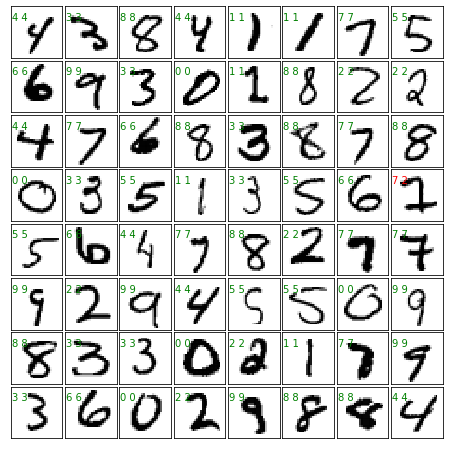

In [55]:
# Plot the prediction
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)


# plot the digits: each image is 28x28 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(28,28), cmap=plt.cm.binary,
              interpolation='nearest')

    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(expected[i])+" "+str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(expected[i])+" "+str(predicted[i]), color='red')

**Number of true matches:**

In [56]:
matches = (predicted == expected)
print(matches.sum())

9793


The total number of data points



In [57]:
print(len(matches))

10000


And now, the ratio of correct predictions



In [58]:
matches.sum() / float(len(matches))

0.9793

Print the classification report



In [59]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1025
           1       0.99      0.99      0.99      1107
           2       0.96      0.99      0.97       983
           3       0.98      0.97      0.98       988
           4       0.97      0.98      0.98       998
           5       0.98      0.98      0.98       907
           6       0.98      0.99      0.98       951
           7       0.99      0.97      0.98      1045
           8       0.98      0.97      0.98       945
           9       0.97      0.97      0.97      1051

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# **Print the confusion matrix (expected true label vs. the reconstructed label)**



In [60]:
print(metrics.confusion_matrix(expected, predicted))

plt.show()

[[1012    1    3    0    1    0    5    0    1    2]
 [   0 1095    4    0    3    0    1    3    0    1]
 [   2    1  969    2    2    0    1    1    3    2]
 [   0    2    7  962    1    6    0    1    4    5]
 [   1    1    3    1  981    0    0    1    1    9]
 [   1    0    1    2    3  888    7    1    2    2]
 [   5    1    1    0    4    2  937    0    1    0]
 [   0    1   15    5    4    1    0 1009    4    6]
 [   2    0    8    2    1    6    2    1  919    4]
 [   2    2    0    5   11    2    1    4    3 1021]]
